In [8]:
import numpy as np 
import matplotlib.pyplot as plt

degree= 4
MSE= 13.30
variance = 0.06


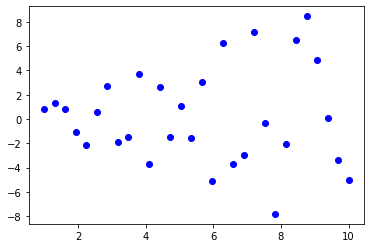

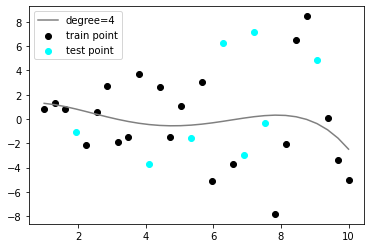

In [6]:
def f(x): # функция
    return x*np.sin(pow(x,2))
x=np.linspace(1,10,30) 
y=f(x) # y = функция

plt.plot(x,y,'ob')

X=x[:,np.newaxis]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
colors=['red','yellow','teal','gray']


degree=4 # степень регрессии
count=3

poly=make_pipeline(PolynomialFeatures(degree),Ridge())
poly.fit(X_train,y_train) # обучаем модель
y_pred=poly.predict(X_train)

print('degree= %d' %degree)
print('MSE= %.2f' % mean_squared_error(y_train,y_pred)) 
print('variance = %.2f' % r2_score(y_train,y_pred))  

h=poly.predict(X) 

plt.figure(2)
plt.scatter(X_train,y_train,color="black", marker='o', label='train point')
plt.scatter(X_test,y_test, color="aqua", marker='o', label='test point')
plt.plot(X,h,color=colors[count], label='degree=%d' %degree)
plt.legend(loc='upper left')

degree= 2
MSE= 14.50
variance = 0.04
degree= 3
MSE= 10.21
variance = 0.32
degree= 7
MSE= 0.06
variance = 1.00
degree= 9
MSE= 0.00
variance = 1.00


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.13911e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


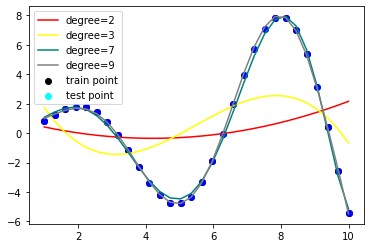

In [3]:
def f(x):
    return x*np.sin(x)
x=np.linspace(1,10,30)
y=f(x)

plt.plot(x,y,'ob')
X=x[:,np.newaxis]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
colors=['red','yellow','teal','gray']
count=1

for count,degree in enumerate ([2,3,7,9]):
    poly=make_pipeline(PolynomialFeatures(degree),Ridge()) #Конвертируем
    poly.fit(X_train,y_train) #Обучаем
    y_pred=poly.predict(X_train) #создание контрольных точек на полинамиальной кривой
    
    print('degree= %d' %degree)
    print('MSE= %.2f' % mean_squared_error(y_train,y_pred)) 
    print('variance = %.2f' % r2_score(y_train,y_pred))
    
    plt.figure(1)
    h=poly.predict(X)
    plt.plot(X,h,color=colors[count], label='degree=%d' %degree)
plt.scatter(X_train,y_train,color="black", marker='o', label='train point')
plt.scatter(X_test,y_test, color="aqua", marker='o', label='test point')
plt.legend(loc='upper left')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68865e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Degree= 7.00
Mean squared error: 857.33
variance error: 1.00


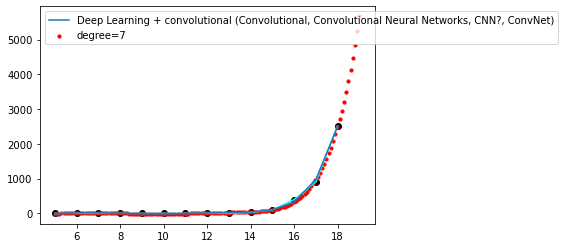

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("C:\\Users\\User\\PROJECT\\Labs AI\\DeepLearning_v.1.0.csv",encoding='latin1')

keys=np.array(df.keys())
labels=np.array(df['Field'])


n=1
ka=np.array(keys.shape)
scnum=df.loc[n,keys[1:ka[0]-1]]
y=np.array(scnum)
x=keys[1:ka[0]-1] 


#degree > 3 != Значение слишком большие
# для избежания этого:
x=[int(i) for i in x] 
x=np.array(x)
x=x-2000 

X=x[:,np.newaxis] #разделяем модель на оси


# точки на каждый год
dotPerYear=10
x2=np.linspace(x[0],x[-1]+1,((x[-1]+1)-x[0])*dotPerYear) # задаём значение
#x2 задаём набор данных
X2=x2[:,np.newaxis] 

degree=7
count=1
regressor=make_pipeline(PolynomialFeatures(degree), Ridge())
regressor.fit(X, y)
y_pred=regressor.predict(X) # предполагаем что точки на графике полинамиальное
y_pred2=regressor.predict(X2)

print('Degree= %.2f' % degree) # степень
print('Mean squared error: %.2f' % mean_squared_error(y,y_pred)) # отклонение
print('variance error: %.2f' % r2_score(y,y_pred)) # отклонение

plt.figure(8)
plt.scatter(X,y, color='black', marker='o')
plt.plot(X,y,color='cyan' )

plt.scatter(X2,y_pred2,s=10, marker='o', color='red', label='degree=%d' % degree)
plt.plot(X,y_pred,label= labels[count])
plt.legend(loc='upper left')
plt.show()


mean_squared_error = 0.587697791666604
r2_score = 0.9593043132867242


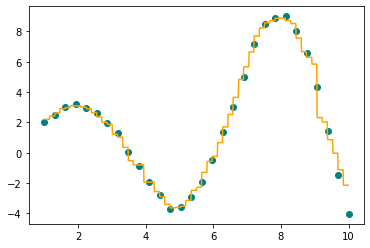

In [2]:
from sklearn.ensemble import RandomForestRegressor

def f(x):
    return x*np.sin(x)+1

x=np.linspace(1,10,30)
y=f(x)

num=np.random.randint(0, 10)
r=np.random.rand(num)

X=[]
Y=[]
for i in range(len(x)):
    X.append(x[i] + r[np.random.randint(len(r))])
    Y.append(y[i] + r[np.random.randint(len(r))])

X=x[:,np.newaxis]

X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=1)

regressor=RandomForestRegressor(n_estimators=10, random_state=0) 

regressor.fit(X, Y)

y_pred=regressor.predict(X_test)

print('mean_squared_error =', mean_squared_error(y_test,y_pred))
print('r2_score =', r2_score(y_test,y_pred))

X_grid_data = np.arange(min(X), max(X), 0.01)
X_grid_data = X_grid_data.reshape((len(X_grid_data), 1))
h = regressor.predict(X_grid_data)
plt.scatter(X, Y, color = 'teal')
plt.plot(X_grid_data,h, color = 'orange')